<a href="https://colab.research.google.com/github/Balaji507/Leaf-disease-detection/blob/main/1_corn_%26_maize.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install -U mxnet-cu101==1.7.0
!pip install d2l==1.0.0-beta0

import keras.utils as image
import numpy as np
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import tensorflow 
import keras
from tensorflow.keras.models import Model as model

import pandas as pd
import numpy as np
import os
import keras
import random
import cv2
import math
import seaborn as sns

from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

from tensorflow.keras.layers import Dense,GlobalAveragePooling2D,Convolution2D,BatchNormalization
from tensorflow.keras.layers import Flatten,MaxPooling2D,Dropout

from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.applications.densenet import preprocess_input

from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,img_to_array

from tensorflow.keras.models import Model

from tensorflow.keras.optimizers import Adam

from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

import warnings
warnings.filterwarnings("ignore")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
classification_result='corn and maize'

In [ ]:
if classification_result=='corn and maize':
  train_path="/content/drive/MyDrive/Datasets/Corn_and_Maize/train"
  test_path="/content/drive/MyDrive/Datasets/Corn_and_Maize/test"
  det_dictionary = {0: "blight", 1: "common rust", 2: "gray leaf spot", 3: "healthy"}
elif classification_result=='cotton':
  train_path="/content/drive/MyDrive/Datasets/Cotton/train"
  test_path="/content/drive/MyDrive/Datasets/Cotton/test"
  det_dictionary = {0: "Black root rot", 1: "Lint contamination", 2: "Healthy", 3: "Healthy"}
elif classification_result=='grape':
  train_path="/content/drive/MyDrive/Datasets/Grape/train"
  test_path="/content/drive/MyDrive/Datasets/Grape/test"
  det_dictionary = {0: "Black rot(grape)", 1: "Grape Esca (Black Measles)", 2: "healthy", 3: "leaf blight (Isariopsis Leaf Spot)"}
elif classification_result=='potato':
  train_path="/content/drive/MyDrive/Datasets/Potato/Train"
  test_path="/content/drive/MyDrive/Datasets/Potato/Test"
  det_dictionary = {0: "Early blight", 1: "Healthy", 2: "late blight"}
elif classification_result=='tomato':
  train_path="/content/drive/MyDrive/Datasets/Tomato/train"
  test_path="/content/drive/MyDrive/Datasets/Tomato/test"
  det_dictionary = {0: "bacterial spot", 1: "Early Blight", 2: "Healthy", 3: "Late Blight", 4: "Leaf Mold", 5: "Septoria leaf spot", 6: "Spider mites", 7: "Target spot", 8: "Mosaic virus", 9: "Yellow leaf curl virus"}

In [ ]:
trdata = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

tsdata = ImageDataGenerator(rescale = 1./255)
traindata = trdata.flow_from_directory(directory=train_path,target_size=(256,256),batch_size = 32,class_mode = 'categorical')
testdata = tsdata.flow_from_directory(directory=test_path, target_size=(256,256),batch_size = 32,class_mode = 'categorical')

Found 3651 images belonging to 4 classes.
Found 547 images belonging to 4 classes.


In [ ]:
num_classes=len(traindata.class_indices)
print(num_classes)

4


In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 30, 30, 128)     

In [ ]:
history = model.fit_generator(traindata,epochs=15,validation_data=testdata)

Epoch 1/15
115/115 [==============================] - 885s 8s/step - loss: 0.7694 - accuracy: 0.7012 - val_loss: 0.7939 - val_accuracy: 0.6746
Epoch 2/15
115/115 [==============================] - 834s 7s/step - loss: 0.4440 - accuracy: 0.8285 - val_loss: 0.6636 - val_accuracy: 0.7075
Epoch 3/15
115/115 [==============================] - 828s 7s/step - loss: 0.3823 - accuracy: 0.8398 - val_loss: 0.8551 - val_accuracy: 0.6984
Epoch 4/15
115/115 [==============================] - 829s 7s/step - loss: 0.3941 - accuracy: 0.8450 - val_loss: 0.6588 - val_accuracy: 0.7130
Epoch 5/15
115/115 [==============================] - 830s 7s/step - loss: 0.3534 - accuracy: 0.8617 - val_loss: 0.5891 - val_accuracy: 0.7349
Epoch 6/15
115/115 [==============================] - 830s 7s/step - loss: 0.3007 - accuracy: 0.8737 - val_loss: 0.4997 - val_accuracy: 0.7697
Epoch 7/15
115/115 [==============================] - 832s 7s/step - loss: 0.3074 - accuracy: 0.8844 - val_loss: 0.4953 - val_accuracy: 0.7861

In [ ]:
model.save("/content/drive/MyDrive/Model_Save/corn_and_maize.h5")

In [ ]:
from keras.models import load_model
classifier=load_model("/content/drive/MyDrive/Model_Save/corn_and_maize.h5")

In [ ]:
img = image.load_img('/content/drive/MyDrive/Datasets/Corn_and_Maize/test/healthy/Corn_Health (1102).jpg', target_size=(256, 256))
x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)
x = x / 255.
predictions = classifier.predict(x)
class_index = predictions
class_index1 = np.argmax(predictions)
print(class_index)
detection_result = (det_dictionary[class_index1])
print(detection_result)


1/1 [==============================] - 0s 160ms/step
[[8.1990525e-04 5.4089603e-04 1.2625815e-04 9.9851292e-01]]
healthy


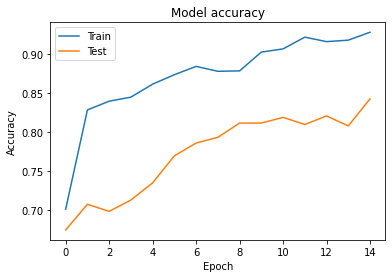

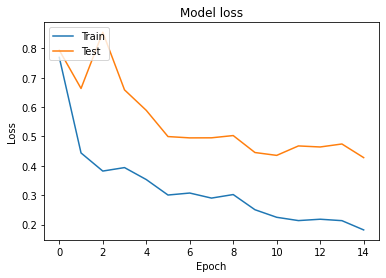

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()